# Pre Processing



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing Dataset
df_train = pd.read_csv("RavdessAudioOnlyFeatures_TRAIN.csv")
df_test = pd.read_csv("RavdessAudioOnlyFeatures_TEST.csv")


In [ ]:
# Getting,
# Numeric Columns
numeric_cols = list(df_train.select_dtypes(exclude=['object']).columns)

In [ ]:
# do a min max standardization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_train[numeric_cols] = scaler.fit_transform(df_train[numeric_cols])
df_test[numeric_cols] = scaler.transform(df_test[numeric_cols])

In [ ]:
df_train['emotional_intensity'].value_counts()

normal    984
strong    844
Name: emotional_intensity, dtype: int64

In [ ]:
round(df_train['emotional_intensity'].value_counts()/df_train['emotional_intensity'].count() * 100, 2)

normal    53.83
strong    46.17
Name: emotional_intensity, dtype: float64

<AxesSubplot:ylabel='emotional_intensity'>

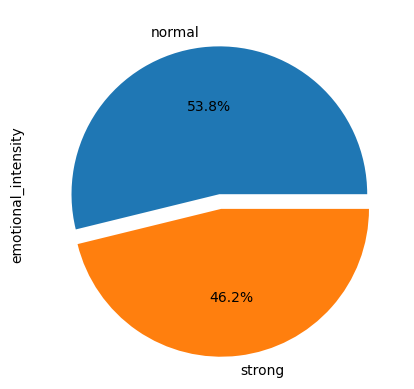

In [ ]:
df_train['emotional_intensity'].value_counts().plot(kind = 'pie',explode= (0,0.1),autopct='%1.1f%%')


In [ ]:
# Getting,

# Categorical Columns
categorical_cols = list(df_train.select_dtypes(include=['object']).columns)

# Numeric Columns
numeric_cols = list(df_train.select_dtypes(exclude=['object']).columns)

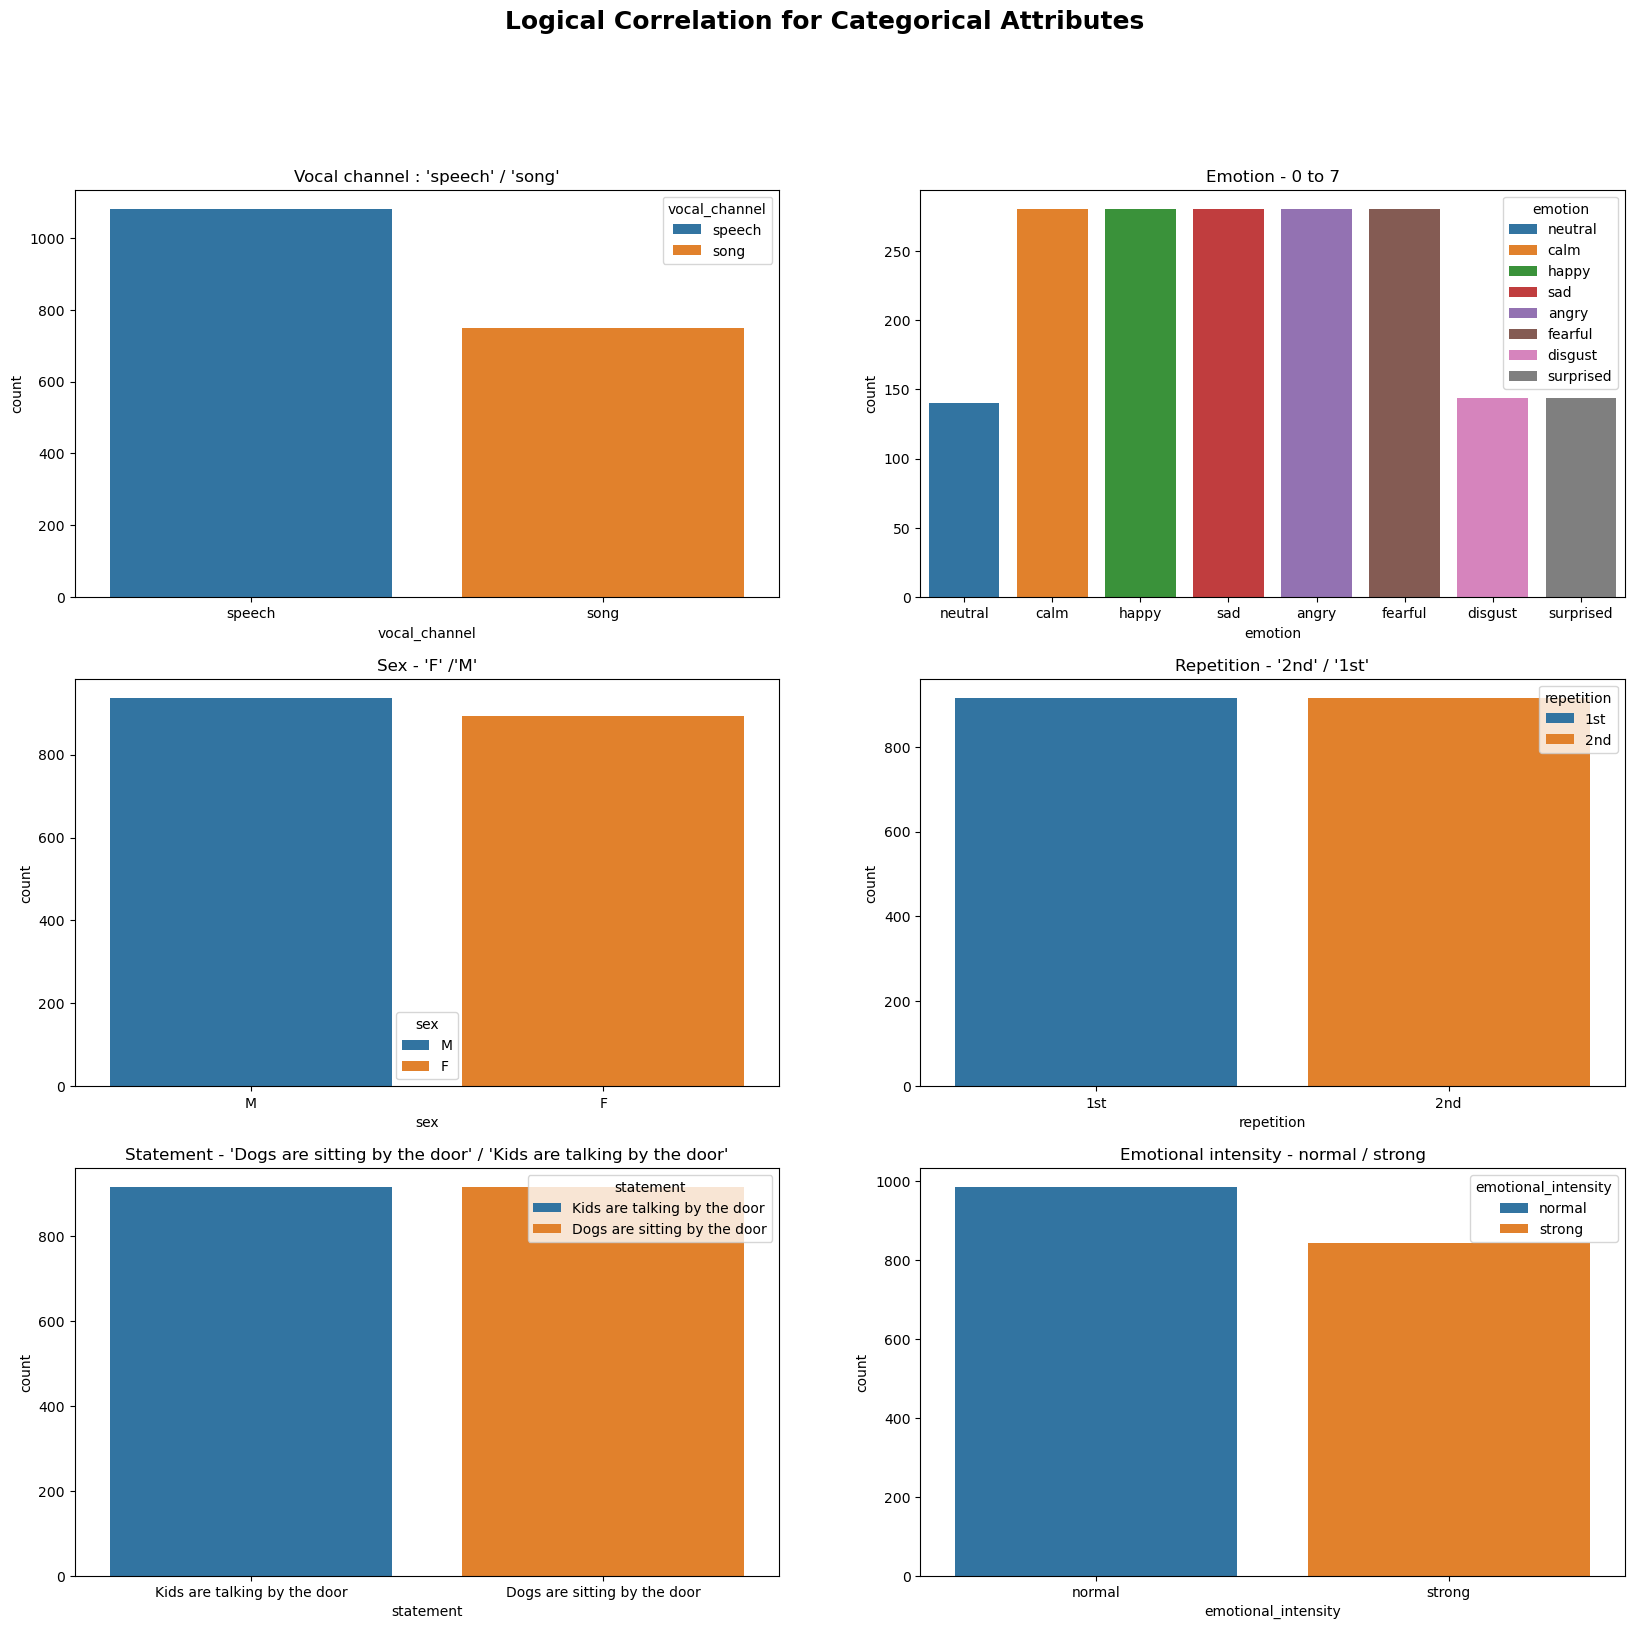

In [ ]:
fig, [[ax1, ax2], [ax3, ax4], [ax5, ax6]] = plt.subplots(3, 2, figsize = (20,18)) #checking the distribution

sns.countplot(data=df_train, x="vocal_channel", ax= ax1, hue = "vocal_channel", dodge=False)
ax1.set_title("Vocal channel : 'speech' / 'song'")

sns.countplot(data=df_train, x="emotion", ax= ax2, hue = "emotion", dodge=False)
# plt.xticks(rotation =90
ax2.set_title("Emotion - 0 to 7")

sns.countplot(data=df_train, x="sex", ax= ax3, hue = "sex", dodge=False)
ax3.set_title("Sex - 'F' /'M'")

sns.countplot(data=df_train, x="repetition", ax= ax4, hue = "repetition", dodge=False)
ax4.set_title("Repetition - '2nd' / '1st'")

sns.countplot(data=df_train, x="statement", ax= ax5, hue = "statement", dodge=False)
ax5.set_title("Statement - 'Dogs are sitting by the door' / 'Kids are talking by the door'")

sns.countplot(data=df_train, x="emotional_intensity", ax= ax6, hue = "emotional_intensity", dodge=False)
ax6.set_title("Emotional intensity - normal / strong")

plt.suptitle("Logical Correlation for Categorical Attributes",fontsize = 18, fontweight='bold')
plt.show()

In [ ]:
# Checking No. of Instances
df_train.index

RangeIndex(start=0, stop=1828, step=1)

In [ ]:
# Checking No. of Instances
len(df_train.columns)

434

In [ ]:
# Getting,
# Numeric Columns
numeric_cols = list(df_train.select_dtypes(exclude=['object']).columns)

In [ ]:
# Getting,

# Categorical Columns
categorical_cols = list(df_train.select_dtypes(include=['object']).columns)

In [ ]:
categorical_cols

['modality',
 'vocal_channel',
 'emotion',
 'emotional_intensity',
 'statement',
 'repetition',
 'sex',
 'filename']

In [ ]:
# len of num and cat cols
print("total cols: {}, num cols : {}, cat cols : {}".format(len(df_train.columns), len(numeric_cols), len(categorical_cols)))

total cols: 434, num cols : 426, cat cols : 8


In [ ]:
# droppinf file name cz it doesnt matter
df_train.drop(columns='filename',axis=1, inplace=True)

In [ ]:
categorical_cols.remove("filename")

In [ ]:
for x in categorical_cols:
    print("{}: {}".format(x, df_train[x].unique()))

modality: ['audio-only']
vocal_channel: ['speech' 'song']
emotion: ['neutral' 'calm' 'happy' 'sad' 'angry' 'fearful' 'disgust' 'surprised']
emotional_intensity: ['normal' 'strong']
statement: ['Kids are talking by the door' 'Dogs are sitting by the door']
repetition: ['1st' '2nd']
sex: ['M' 'F']


In [ ]:
df_train['modality'].value_counts()

audio-only    1828
Name: modality, dtype: int64

In [ ]:
df_train["emotion"]

0         neutral
1         neutral
2         neutral
3         neutral
4            calm
          ...    
1823    surprised
1824    surprised
1825    surprised
1826    surprised
1827    surprised
Name: emotion, Length: 1828, dtype: object

In [ ]:
df_train.shape

(1828, 433)

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# create an instance of the OneHotEncoder class
encoder = OneHotEncoder(categories='auto', sparse=False)

# fit the encoder to the data
encoder.fit(df_train[["emotion"]])

# transform the data using the encoder
encoded_data = encoder.transform(df_train[["emotion"]])

# create a new DataFrame with the one-hot encoded data
encoded_df = pd.DataFrame(encoded_data, columns=[f'{"emotion"}_{i}' for i in range(8)])

# concatenate the original DataFrame with the encoded DataFrame
df_train = pd.concat([df_train, encoded_df], axis=1)
df_train = df_train.drop(columns=["emotion"])

##Test Set
# fit the encoder to the data
encoder.fit(df_test[["emotion"]])

# transform the data using the encoder
encoded_data = encoder.transform(df_test[["emotion"]])

# create a new DataFrame with the one-hot encoded data
encoded_df = pd.DataFrame(encoded_data, columns=[f'{"emotion"}_{i}' for i in range(8)])

# concatenate the original DataFrame with the encoded DataFrame
df_test = pd.concat([df_test, encoded_df], axis=1)
df_test = df_test.drop(columns=["emotion"])

In [ ]:
df_train

,modality,vocal_channel,emotional_intensity,statement,repetition,actor,sex,frame_count,sum,mean,...,stft_kur_w4,stft_skew_w4,emotion_0,emotion_1,emotion_2,emotion_3,emotion_4,emotion_5,emotion_6,emotion_7
0,audio-only,speech,normal,Kids are talking by the door,1st,0.0,M,0.107840,0.385871,0.435971,...,0.956060,0.048224,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,audio-only,speech,normal,Kids are talking by the door,2nd,0.0,M,0.117646,0.385792,0.435878,...,0.107604,0.360443,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,audio-only,speech,normal,Dogs are sitting by the door,1st,0.0,M,0.098033,0.385883,0.435989,...,0.379996,0.189619,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,audio-only,speech,normal,Dogs are sitting by the door,2nd,0.0,M,0.068626,0.385857,0.435972,...,0.119724,0.316584,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,audio-only,speech,normal,Kids are talking by the door,1st,0.0,M,0.176466,0.385852,0.435923,...,0.201877,0.273444,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1823,audio-only,speech,normal,Dogs are sitting by the door,2nd,1.0,F,0.166666,0.385107,0.435124,...,0.217423,0.184008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1824,audio-only,speech,strong,Kids are talking by the door,1st,1.0,F,0.205885,0.385144,0.435179,...,0.089668,0.275975,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1825,audio-only,speech,strong,Kids are talking by the door,2nd,1.0,F,0.176472,0.384963,0.434975,...,0.112596,0.280463,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1826,audio-only,speech,strong,Dogs are sitting by the door,1st,1.0,F,0.274511,0.385282,0.435335,...,0.130564,0.226081,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
encoded_df

,emotion_0,emotion_1,emotion_2,emotion_3,emotion_4,emotion_5,emotion_6,emotion_7
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
619,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
620,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
621,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
622,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
# Converting Categorical Attributes to Numeric Values

statement_map = {"Dogs are sitting by the door": 0, "Kids are talking by the door": 1}

emotional_intensity_map = {"normal": 0, "strong": 1}

# emotion_map = {'neutral':0, 'calm':1, 'happy':2, 'sad':3, 'angry':4, 'fearful':5, 'disgust':6, 'surprised':7}

repetition_map = {"1st": 0, "2nd": 1}

vocal_channel_map = {"speech": 0, "song": 1}

sex_map = {"M": 0, "F": 1}
# "emotion": emotion_map
df_train.replace({"sex": sex_map, "emotional_intensity": emotional_intensity_map, 
            "vocal_channel": vocal_channel_map, "repetition": repetition_map, 
           "statement": statement_map}, inplace=True)

df_test.replace({"sex": sex_map, "emotional_intensity": emotional_intensity_map, 
            "vocal_channel": vocal_channel_map, "repetition": repetition_map, 
           "statement": statement_map}, inplace=True)

In [ ]:
df_train.drop(columns='modality',axis=1, inplace=True)

In [ ]:
categorical_cols.remove("modality")

In [ ]:
numerical_cols = [col for col in df_train.columns if col not in categorical_cols]

In [ ]:
# # do a min max standardization
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# df_train[numerical_cols] = scaler.fit_transform(df_train[numerical_cols])
# df_test[numerical_cols] = scaler.transform(df_test[numerical_cols])

In [ ]:
df_train.shape

(1828, 439)

In [ ]:
df_train["vocal_channel"].value_counts()

0    1080
1     748
Name: vocal_channel, dtype: int64

In [ ]:
df_train["emotional_intensity"].value_counts()

0    984
1    844
Name: emotional_intensity, dtype: int64

In [ ]:
target_name = 'emotional_intensity'

attributes = [col for col in df_train.columns if col != target_name]

In [ ]:
X = df_train[attributes].values
y = df_train[target_name]

In [ ]:
df_test["emotion_7"]

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
619    0.0
620    0.0
621    0.0
622    0.0
623    0.0
Name: emotion_7, Length: 624, dtype: float64

In [ ]:
X_train = df_train[attributes]
y_train = df_train[target_name]
X_test = df_test[attributes]
y_test = df_test[target_name]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [ ]:
df_train["emotional_intensity"].value_counts()

0    984
1    844
Name: emotional_intensity, dtype: int64

In [ ]:
df_test["emotional_intensity"].value_counts()

0    336
1    288
Name: emotional_intensity, dtype: int64

# Missing Value

In [ ]:
# Getting number of Missing Values
df_train.isnull().sum()

vocal_channel          0
emotional_intensity    0
statement              0
repetition             0
actor                  0
                      ..
emotion_3              0
emotion_4              0
emotion_5              0
emotion_6              0
emotion_7              0
Length: 439, dtype: int64

In [ ]:
# Evaluating Missing Values in Percentage
def percentage_missing(df):
    percent_nan = round(100  * df.isnull().sum() / len(df), 2)
    percent_nan = percent_nan[percent_nan > 0].sort_values()
    return percent_nan

percent_nan = percentage_missing(df_train)
percent_nan

Series([], dtype: float64)

In [ ]:
# Getting number of Missing Values
df_train.isnull().sum()

vocal_channel          0
emotional_intensity    0
statement              0
repetition             0
actor                  0
                      ..
emotion_3              0
emotion_4              0
emotion_5              0
emotion_6              0
emotion_7              0
Length: 439, dtype: int64

In [ ]:
# Evaluating Missing Values in Percentage
def percentage_missing(df):
    percent_nan = round(100  * df.isnull().sum() / len(df), 2)
    percent_nan = percent_nan[percent_nan > 0].sort_values()
    return percent_nan

percent_nan = percentage_missing(df_train)
percent_nan

Series([], dtype: float64)

# Initial Classification test with raw data

## 1)Decision Tree

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
criterion = ['gini', 'entropy']
max_depth = [2,4,6,8,10,12]

param_grid = {'criterion': criterion,
             "max_depth" : max_depth
             }

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train,y_train)

grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='accuracy',
                          cv=5)

grid_model.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12]},
             scoring='accuracy')

In [ ]:
dec_tree = grid_model.best_estimator_
dec_tree

DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=42)

In [ ]:
y_pred = dec_tree.predict(X_val)

In [ ]:
len(X_train)

1371

In [ ]:
len(X_val)

457

In [ ]:
# # Print feature importance for non-zero values
# for i in range(len(dec_tree.feature_importances_)):
#     if dec_tree.feature_importances_[i] != 0:
#         print(f"{X_train.columns[i]}: {dec_tree.feature_importances_[i]:.4f}")


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, classification_report
print('Accuracy %s' % accuracy_score(y_val, y_pred))
print('F1-score %s' % f1_score(y_val, y_pred, average=None))
print(classification_report(y_val, y_pred, digits=3))

Accuracy 0.7308533916849015
F1-score [0.73085339 0.73085339]
              precision    recall  f1-score   support

           0      0.788     0.682     0.731       245
           1      0.682     0.788     0.731       212

    accuracy                          0.731       457
   macro avg      0.735     0.735     0.731       457
weighted avg      0.739     0.731     0.731       457



## 2)KNN

In [ ]:
import math
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Creating a Pipeline to find K value
scaler = StandardScaler()
knn = KNeighborsClassifier()

operations = [('scaler',scaler),('knn',knn)]
pipe = Pipeline(operations)

k_values = list(range(1, int(math.sqrt(len(df_train)) + 1)))
param_grid = {'knn__n_neighbors': k_values}

full_cv_classifier = GridSearchCV(pipe,param_grid,cv=10,scoring='accuracy')
full_cv_classifier.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20, 21, 22, 23, 24, 25, 26, 27,
                                              28, 29, 30, ...]},
             scoring='accuracy')

In [ ]:
full_cv_classifier.cv_results_['mean_test_score']

array([0.71844388, 0.70022215, 0.71991431, 0.70240135, 0.70894425,
       0.69582672, 0.71918439, 0.70750555, 0.72063895, 0.70896541,
       0.71699989, 0.70459642, 0.72064424, 0.7060457 , 0.72061779,
       0.70019042, 0.71112345, 0.7052999 , 0.71332381, 0.70019042,
       0.71112345, 0.69655665, 0.71551888, 0.70020628, 0.7082249 ,
       0.70166085, 0.70750026, 0.70531048, 0.70894954, 0.70019571,
       0.70749498, 0.70020099, 0.7031207 , 0.69874643, 0.70458585,
       0.70166614, 0.70969005, 0.70385063, 0.71187454, 0.70531048,
       0.71114461, 0.70531048])

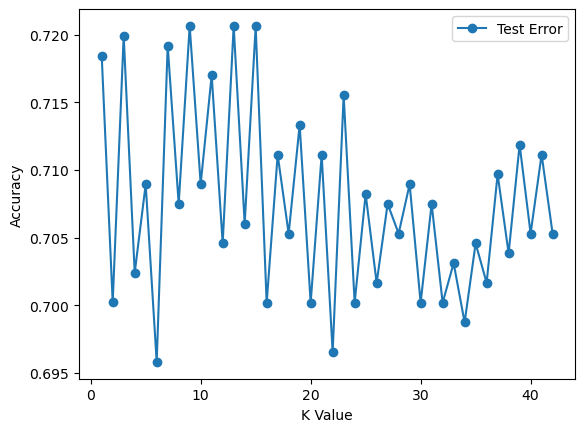

In [ ]:
scores = full_cv_classifier.cv_results_['mean_test_score']
plt.plot(k_values,scores,'o-', label='Test Error')
plt.xlabel("K Value")
plt.ylabel("Accuracy")
plt.legend()

In [ ]:
print(full_cv_classifier.best_score_), print(full_cv_classifier.best_params_), print(full_cv_classifier.best_estimator_)

0.7206442399238336
{'knn__n_neighbors': 13}
Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=13))])


(None, None, None)

In [ ]:
y_pred = full_cv_classifier.predict(X_val)
from sklearn.metrics import accuracy_score, f1_score, classification_report
print('Accuracy %s' % accuracy_score(y_val, y_pred))
print('F1-score %s' % f1_score(y_val, y_pred, average=None))
print(classification_report(y_val, y_pred, digits=3))
# # Getting highly correlated atttributes count

Accuracy 0.7045951859956237
F1-score [0.76439791 0.60410557]
              precision    recall  f1-score   support

           0      0.668     0.894     0.764       245
           1      0.798     0.486     0.604       212

    accuracy                          0.705       457
   macro avg      0.733     0.690     0.684       457
weighted avg      0.728     0.705     0.690       457



In [ ]:
# # # Compute the correlation matrix
# # corr_matrix = df_train.corr()

# # # Select upper triangle of correlation matrix
# # upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# # # Find number of highly correlated features above different thresholds
# # no_corr_att = [] #no. of correlated attributes
# # for i in range(100, 0, -1):
# #     threshold = i * 0.01
# #     highly_correlated = [column for column in upper.columns if any(upper[column] > threshold)]
# #     no_corr_att.append(len(highly_correlated))
# #     print(int(threshold*100), len(highly_correlated))
    

# # # Plot the highly correlated features against different thresholds
# # plt.plot(np.arange(1, 101)[::-1], no_corr_att)
# # plt.xlabel('Threshold (%)')
# # plt.ylabel('Number of highly correlated features')
# # plt.title('Highly correlated features vs Threshold plot')
# # plt.show()

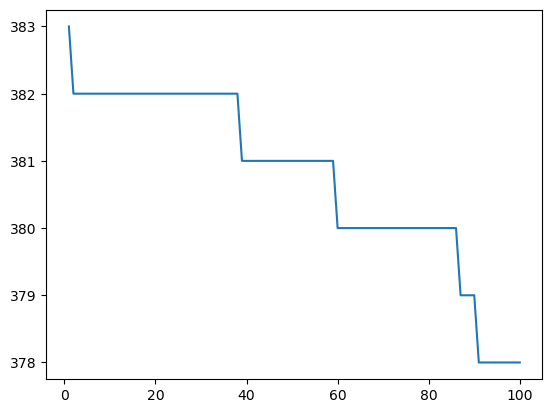

In [ ]:
# Getting Highly correlated attributes from 100% to 1%

# Compute the correlation matrix
corr_matrix = df_train.corr()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find index of feature columns with correlation greater than 0.9
no_corr_att = [] #no. of correlated attributes

for i in range(100, 0, -1):
     highly_correlated = [column for column in upper.columns if any(upper[column] > (i * 0.001))]
     no_corr_att.append(len(highly_correlated))

plt.plot(range(100, 0, -1), no_corr_att)

(370.75, 371.5)

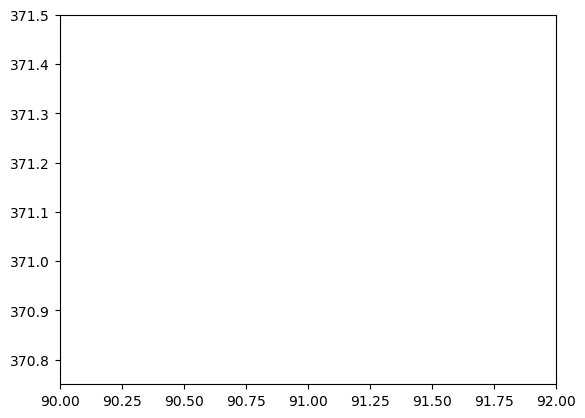

In [ ]:
plt.plot(range(100, 0, -1), no_corr_att)
plt.xlim(90, 92)
plt.ylim(370.75, 371.5)

# so, above 91% there are 371 highly correlated attributes to be removed

In [ ]:
highly_correlated = [column for column in upper.columns if any(upper[column] > (91 * 0.001))]
len(highly_correlated)
len(df_train.columns) - len(highly_correlated)

61

## Removing Highly Correlated Attributes

In [ ]:
# Identify highly correlated features
corr_matrix = df_train.corr()
high_corr_features = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.7:
            colname = corr_matrix.columns[i]
            high_corr_features.add(colname)

# Remove highly correlated features
remaining_features = [col for col in df_train.columns if col not in high_corr_features]
removed_features = high_corr_features
retained_features = remaining_features
print(f"Number of features removed: {len(removed_features)}")
print(f"Number of features retained: {len(retained_features)}")

Number of features removed: 282
Number of features retained: 157


In [ ]:
if "emotional_intensity" in retained_features:
    retained_features.remove("emotional_intensity")

### Performance after removing Highly correlated Attributes


In [ ]:
### Decision tree

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Define the hyperparameters to search over
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 4, 6, 8, 10],
    'min_samples_split': [2, 4, 6, 8, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5]
}

# Create a decision tree classifier object
clf = DecisionTreeClassifier(random_state=42)

# Create a grid search object
grid_search = GridSearchCV(clf, param_grid, cv=5)

# Fit the grid search object to the data
X_train_selected = X_train.loc[:, retained_features]
grid_search.fit(X_train_selected, y_train)

# Use the best estimator to make predictions on the test set
X_val_selected = X_val.loc[:, retained_features]
y_pred = grid_search.best_estimator_.predict(X_val_selected)

# Print the evaluation metrics
print('Accuracy %s' % accuracy_score(y_val, y_pred))
print('F1-score %s' % f1_score(y_val, y_pred, average=None))
print(classification_report(y_val, y_pred))

Accuracy 0.7133479212253829
F1-score [0.77217391 0.61356932]
              precision    recall  f1-score   support

           0       0.67      0.91      0.77       245
           1       0.82      0.49      0.61       212

    accuracy                           0.71       457
   macro avg       0.75      0.70      0.69       457
weighted avg       0.74      0.71      0.70       457



In [ ]:
### KNN

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Define the hyperparameters to search over
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]
}

# Create a KNN classifier object
clf = KNeighborsClassifier()

# Create a grid search object
grid_search = GridSearchCV(clf, param_grid, cv=5)

# Fit the grid search object to the data
X_train_selected = X_train.loc[:, retained_features]
grid_search.fit(X_train_selected, y_train)

# Use the best estimator to make predictions on the test set
X_val_selected = X_val.loc[:, retained_features]
y_pred = grid_search.best_estimator_.predict(X_val_selected)

# Print the evaluation metrics
print('Accuracy %s' % accuracy_score(y_val, y_pred))
print('F1-score %s' % f1_score(y_val, y_pred, average=None))
print(classification_report(y_val, y_pred))

Accuracy 0.6783369803063457
F1-score [0.73321234 0.59504132]
              precision    recall  f1-score   support

           0       0.66      0.82      0.73       245
           1       0.72      0.51      0.60       212

    accuracy                           0.68       457
   macro avg       0.69      0.67      0.66       457
weighted avg       0.69      0.68      0.67       457



## Removing Highly Variance and Highly Correlated Attributes

In [ ]:
# Identify highly correlated features
corr_matrix = df_train.corr()
high_corr_features = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.7:
            colname = corr_matrix.columns[i]
            high_corr_features.add(colname)

# Identify low variance features among highly correlated features
variance_threshold = 0.002
low_variance_features = set()
for col in high_corr_features:
    if col in df_train.columns:
        if df_train[col].var() < variance_threshold:
            low_variance_features.add(col)

# Remove highly correlated features and low variance features
remaining_features = [col for col in df_train.columns if col not in high_corr_features.union(low_variance_features)]
removed_features = high_corr_features.union(low_variance_features)
retained_features = remaining_features
print(f"Number of features removed: {len(removed_features)}")
print(f"Number of features retained: {len(retained_features)}")

Number of features removed: 282
Number of features retained: 157


### Performance after removing Highly correlated Attributes


In [ ]:
if "emotional_intensity" in retained_features:
    retained_features.remove("emotional_intensity")

In [ ]:
### Decision tree

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Define the hyperparameters to search over
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 4, 6, 8, 10],
    'min_samples_split': [2, 4, 6, 8, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5]
}

# Create a decision tree classifier object
clf = DecisionTreeClassifier(random_state=42)

# Create a grid search object
grid_search = GridSearchCV(clf, param_grid, cv=5)

# Fit the grid search object to the data
X_train_selected = X_train.loc[:, retained_features]
grid_search.fit(X_train_selected, y_train)

# Use the best estimator to make predictions on the test set
X_val_selected = X_val.loc[:, retained_features]
y_pred = grid_search.best_estimator_.predict(X_val_selected)

# Print the evaluation metrics
print('Accuracy %s' % accuracy_score(y_val, y_pred))
print('F1-score %s' % f1_score(y_val, y_pred, average=None))
print(classification_report(y_val, y_pred))

Accuracy 0.7396061269146609
F1-score [0.78635548 0.66666667]
              precision    recall  f1-score   support

           0       0.70      0.89      0.79       245
           1       0.82      0.56      0.67       212

    accuracy                           0.74       457
   macro avg       0.76      0.73      0.73       457
weighted avg       0.76      0.74      0.73       457



In [ ]:
### KNN

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Define the hyperparameters to search over
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]
}

# Create a KNN classifier object
clf = KNeighborsClassifier()

# Create a grid search object
grid_search = GridSearchCV(clf, param_grid, cv=5)

# Fit the grid search object to the data
X_train_selected = X_train.loc[:, retained_features]
grid_search.fit(X_train_selected, y_train)

# Use the best estimator to make predictions on the test set
X_val_selected = X_val.loc[:, retained_features]
y_pred = grid_search.best_estimator_.predict(X_val_selected)

# Print the evaluation metrics
print('Accuracy %s' % accuracy_score(y_val, y_pred))
print('F1-score %s' % f1_score(y_val, y_pred, average=None))
print(classification_report(y_val, y_pred))

Accuracy 1.0
F1-score [1. 1.]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       245
           1       1.00      1.00      1.00       212

    accuracy                           1.00       457
   macro avg       1.00      1.00      1.00       457
weighted avg       1.00      1.00      1.00       457



# Dimensionality reduction

## 1)Variance Threshold

In [ ]:
# from sklearn.model_selection import cross_validate
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# # obtain predicted probabilities for the positive class
# y_proba = dec_tree.predict_proba(X_train)[:, 1]

# # define the threshold values to try
# thresholds = np.arange(0, 1.1, 0.1)[1:]

# # define a dictionary of evaluation metrics to calculate
# scoring = {
#     'accuracy': 'accuracy',
#     'precision': 'precision',
#     'recall': 'recall',
#     'f1': 'f1'
# }

# # perform cross-validation for each threshold value and calculate the evaluation metrics
# results = {}
# for threshold in thresholds:
#     y_pred = (y_proba >= threshold).astype(int)
#     cv_results = cross_validate(dec_tree, X_train, y_pred, cv=10, scoring=scoring)
#     results[threshold] ={
#         'accuracy': np.mean(cv_results['test_accuracy']),
#         'precision': np.mean(cv_results['test_precision']),
#         'recall': np.mean(cv_results['test_recall']),
#         'f1': np.mean(cv_results['test_f1'])
#     }

# # remove threshold values where accuracy and F1 score are both equal to 1
# results = {k: v for k, v in results.items() if v['accuracy'] < 1 or v['f1'] < 1}

# # print the results for the top 3 best threshold values based on all evaluation metrics
# print("Top 3 best threshold values based on all evaluation metrics:")
# for i, (threshold, metrics) in enumerate(sorted(results.items(), key=lambda x: (x[1]['f1'], x[1]['accuracy'], x[1]['precision'], x[1]['recall']), reverse=True)[:3]):
#     print(f"\n{i+1}. Threshold: {threshold:.2f}")
#     for name, value in metrics.items():
#         print(f"{name.capitalize()}: {value:.4f}")

In [ ]:
X_train.shape

(1371, 438)

In [ ]:
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.feature_selection import VarianceThreshold

# try different threshold values for feature selection
thresholds = [0.001, 0.002, 0.005, 0.01, 0.02, 0.05, 0.1]
results = []
for threshold in thresholds:
    # apply variance threshold feature selection to the training data
    sel = VarianceThreshold(threshold=threshold)
    X_train_sel = sel.fit_transform(X_train)

    # train a decision tree classifier on the selected feature set
    dec_tree = DecisionTreeClassifier(random_state=42)
    dec_tree.fit(X_train_sel, y_train)

    # obtain predicted probabilities for the positive class on the test set
    X_val_sel = sel.transform(X_val)
    y_proba = dec_tree.predict_proba(X_val_sel)[:, 1]

    # define the threshold value to use
    threshold_val = 0.5 # adjust threshold as needed

    # apply the threshold to obtain predicted labels and calculate evaluation metrics
    y_pred = (y_proba >= threshold_val).astype(int)
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)

    result = {
        'threshold': threshold,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'threshold_val': threshold_val,
        'n_features_retained': sum(sel.get_support()),
        'n_features_removed': len(sel.get_support()) - sum(sel.get_support())
    }
    results.append(result)

# sort the results list by F1 score in descending order, then accuracy in descending order
results = sorted(results, key=lambda x: (x['f1'], x['accuracy']), reverse=True)

# print the best result tuple and number of features retained and removed
best_result = results[0]
print(f"\nBest result tuple:")
print(f"Variance Threshold: {best_result['threshold']:.3f}")
print(f"Accuracy: {best_result['accuracy']:.4f}")
print(f"Precision: {best_result['precision']:.4f}")
print(f"Recall: {best_result['recall']:.4f}")
print(f"F1 score: {best_result['f1']:.4f}")
print(f"Number of features retained: {best_result['n_features_retained']}")
print(f"Number of features removed: {best_result['n_features_removed']}")


Best result tuple:
Variance Threshold: 0.002
Accuracy: 0.7002
Precision: 0.6812
Recall: 0.6651
F1 score: 0.6730
Number of features retained: 363
Number of features removed: 75


In [ ]:
# Var threshold = 0.1 has very good performance as determined above
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold = 0.002)
X_train_sel = sel.fit_transform(X_train)

X_train.shape, X_train_sel.shape

((1828, 438), (1828, 360))

In [ ]:
# KNN
X_val_sel = sel.transform(X_val)

clf = KNeighborsClassifier(n_neighbors=13)
clf.fit(X_train_sel, y_train)

y_pred = clf.predict(X_val_sel)

print('Accuracy %s' % accuracy_score(y_val, y_pred))
print('F1-score %s' % f1_score(y_val, y_pred, average=None))
print(classification_report(y_val, y_pred))

X_val.shape, X_val_sel.shape

Accuracy 0.7636761487964989
F1-score [0.80073801 0.70967742]
              precision    recall  f1-score   support

           0       0.73      0.89      0.80       245
           1       0.82      0.62      0.71       212

    accuracy                           0.76       457
   macro avg       0.78      0.75      0.76       457
weighted avg       0.77      0.76      0.76       457



((457, 438), (457, 360))

In [ ]:
# Decision Tree
X_val_sel = sel.transform(X_val)

clf = DecisionTreeClassifier(criterion='entropy', max_depth=2)
clf.fit(X_train_sel, y_train)

y_pred = clf.predict(X_val_sel)

print('Accuracy %s' % accuracy_score(y_val, y_pred))
print('F1-score %s' % f1_score(y_val, y_pred, average=None))
print(classification_report(y_val, y_pred))

X_val.shape, X_val_sel.shape

Accuracy 0.7155361050328227
F1-score [0.77430556 0.61538462]
              precision    recall  f1-score   support

           0       0.67      0.91      0.77       245
           1       0.83      0.49      0.62       212

    accuracy                           0.72       457
   macro avg       0.75      0.70      0.69       457
weighted avg       0.74      0.72      0.70       457



((457, 438), (457, 360))

## 2)Univariate Feature Selection

### KNN

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report

# perform univariate feature selection using the chi-squared test
selector = SelectKBest(chi2, k=10)
X_new = selector.fit_transform(X_train, y_train)

# print the selected feature indices
print("Selected feature indices:", selector.get_support(indices=True))

# train a k-NN classifier with the selected features
clf = KNeighborsClassifier(n_neighbors=13)
clf.fit(X_train, y_train)

# make predictions on the test set
y_pred = clf.predict(X_val)

# print the results
print("Selected features shape:", X_new.shape)
print("Selected features indices:", selector.get_support(indices=True))
print('Accuracy:', accuracy_score(y_val, y_pred))
print('F1-score:', f1_score(y_val, y_pred, average=None))
print(classification_report(y_val, y_pred))

Selected feature indices: [  8  10  17  31 180 263 265 272 299 435]
Selected features shape: (1371, 10)
Selected features indices: [  8  10  17  31 180 263 265 272 299 435]
Accuracy: 0.7045951859956237
F1-score: [0.76357268 0.60641399]
              precision    recall  f1-score   support

           0       0.67      0.89      0.76       245
           1       0.79      0.49      0.61       212

    accuracy                           0.70       457
   macro avg       0.73      0.69      0.68       457
weighted avg       0.73      0.70      0.69       457



### Decision Tree

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report

# perform univariate feature selection using the chi-squared test
selector = SelectKBest(chi2, k=10)
X_new = selector.fit_transform(X_train, y_train)

# print the selected feature indices
print("Selected feature indices:", selector.get_support(indices=True))

# train a Decison Tree classifier with the selected features
clf = DecisionTreeClassifier(criterion='entropy', max_depth=2)
clf.fit(X_train, y_train)

# make predictions on the test set
y_pred = clf.predict(X_val)

# print the results
print("Selected features shape:", X_new.shape)
print("Selected features indices:", selector.get_support(indices=True))
print('Accuracy:', accuracy_score(y_val, y_pred))
print('F1-score:', f1_score(y_val, y_pred, average=None))
print(classification_report(y_val, y_pred))

Selected feature indices: [  8  10  17  31 180 263 265 272 299 435]
Selected features shape: (1371, 10)
Selected features indices: [  8  10  17  31 180 263 265 272 299 435]
Accuracy: 0.7089715536105032
F1-score: [0.77029361 0.60298507]
              precision    recall  f1-score   support

           0       0.67      0.91      0.77       245
           1       0.82      0.48      0.60       212

    accuracy                           0.71       457
   macro avg       0.74      0.69      0.69       457
weighted avg       0.74      0.71      0.69       457



## 3)Recursive Feature Elimination

Best number of features by grid search: 25
Top 6 features selected by RFE are:
Index(['lag1_q01', 'lag1_q05', 'mfcc_std', 'mfcc_q01', 'max_w3', 'q95_w3'], dtype='object')
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.79      0.73       245
           1       0.70      0.56      0.62       212

    accuracy                           0.68       457
   macro avg       0.69      0.67      0.67       457
weighted avg       0.68      0.68      0.68       457



/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


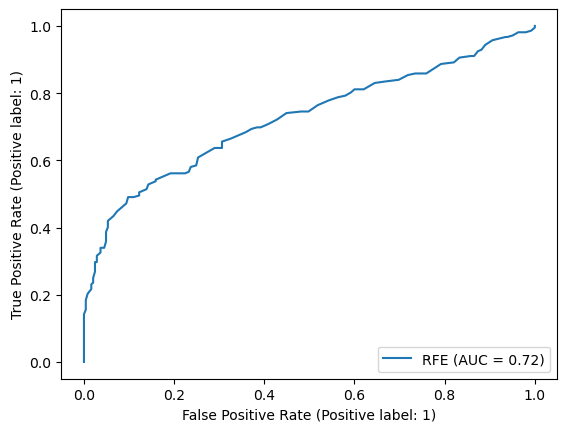

In [ ]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV, cross_val_score

# Train a random forest classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)

# Select features with importance score above 0.01
feature_mask = rfc.feature_importances_ > 0.01

# Apply recursive feature elimination with the selected features
rfe = RFE(estimator=rfc, n_features_to_select=sum(feature_mask), step=1)
rfe.fit(X_train.loc[:, feature_mask], y_train)

# create a range of numbers of features to select
num_features = [25, 50, 75, 100, 125, 150]

# define the RFE estimator to use with the selected features
rfe_selected = RFE(estimator=rfc, n_features_to_select=sum(feature_mask), step=1)

# define the grid search parameters
param_grid = {'n_features_to_select': num_features}

# create the grid search object with cross-validation
grid = GridSearchCV(estimator=rfe_selected, param_grid=param_grid, cv=5)

# fit the grid search object to the data
grid.fit(X_train.loc[:, feature_mask], y_train)

# get the selected features from RFE
selected_features = X_train.loc[:, feature_mask].columns[rfe.support_]

# store the selected features in a list for further classification with other models
selected_features_list = selected_features.tolist()

# print the results
print('Best number of features by grid search:', grid.best_params_['n_features_to_select'])

# print the selected features
# print("Selected Features:")
print('Top {} features selected by RFE are:'.format(len(selected_features)))
print(selected_features)

from sklearn.metrics import accuracy_score, classification_report, f1_score, plot_roc_curve, precision_score, recall_score

# predict using the best estimator from grid search
y_pred = grid.best_estimator_.predict(X_val.loc[:, feature_mask])

# # calculate and print evaluation metrics
# print("Accuracy: ", accuracy_score(y_test, y_pred))
# print("Precision: ", precision_score(y_test, y_pred, average='weighted'))
# print("Recall: ", recall_score(y_test, y_pred, average='weighted'))
# print("F1 Score: ", f1_score(y_test, y_pred, average='weighted'))

# print classification report
print("Classification Report:")
print(classification_report(y_val, y_pred))

# create and plot ROC curve
plot_roc_curve(grid.best_estimator_, X_val.loc[:, feature_mask], y_val)


#Classification Report: 0.005

              precision    recall  f1-score   support

           0       0.67      0.77      0.72       336
           1       0.67      0.56      0.61       288

    accuracy                           0.67       624
   macro avg       0.67      0.66      0.66       624
weighted avg       0.67      0.67      0.67       624


 #Classification Report: 0.009  

              precision    recall  f1-score   support 

           0       0.65      0.90      0.75       336
           1       0.78      0.44      0.56       288

    accuracy                           0.69       624
   macro avg       0.72      0.67      0.66       624
weighted avg       0.71      0.69      0.67       624

#Classification Report: 0.01

              precision    recall  f1-score   support

           0       0.68      0.82      0.74       336
           1       0.72      0.54      0.62       288

    accuracy                           0.69       624
   macro avg       0.70      0.68      0.68       624
weighted avg       0.70      0.69      0.68       624

### Decision Tree

In [ ]:
# Training model on reduced selected features

# Decision Tree
# train a Decison Tree classifier with the selected features
from sklearn.tree import DecisionTreeClassifier

# create a new decision tree classifier with only the selected features
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train.loc[:, feature_mask].loc[:, selected_features], y_train)

# predict using the new decision tree classifier
y_pred = dtc.predict(X_val.loc[:, feature_mask].loc[:, selected_features])

# calculate and print evaluation metrics
print("Accuracy: ", accuracy_score(y_val, y_pred))
print("Precision: ", precision_score(y_val, y_pred, average='weighted', zero_division=1))
print("Recall: ", recall_score(y_val, y_pred, average='weighted', zero_division=1))
print("F1 Score: ", f1_score(y_val, y_pred, average='weighted', zero_division=1))

# create and plot ROC curve
# plot_roc_curve(dtc, X_test.loc[:, feature_mask].loc[:, selected_features], y_test)

# print classification report
print("Classification Report:")
print(classification_report(y_val, y_pred))

Accuracy:  0.5886214442013129
Precision:  0.5872850343553372
Recall:  0.5886214442013129
F1 Score:  0.5875473695284931
Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.64      0.63       245
           1       0.56      0.53      0.54       212

    accuracy                           0.59       457
   macro avg       0.59      0.58      0.58       457
weighted avg       0.59      0.59      0.59       457



### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# create a new KNN classifier with only the selected features
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train.loc[:, feature_mask].loc[:, selected_features], y_train)

# predict using the new decision tree classifier
y_pred = knn.predict(X_val.loc[:, feature_mask].loc[:, selected_features])

# calculate and print evaluation metrics
print("Accuracy: ", accuracy_score(y_val, y_pred))
print("Precision: ", precision_score(y_val, y_pred, average='weighted', zero_division=1))
print("Recall: ", recall_score(y_val, y_pred, average='weighted', zero_division=1))
print("F1 Score: ", f1_score(y_val, y_pred, average='weighted', zero_division=1))

# create and plot ROC curve
# plot_roc_curve(dtc, X_test.loc[:, feature_mask].loc[:, selected_features], y_test)

# print classification report
print("Classification Report:")
print(classification_report(y_val, y_pred))

Accuracy:  0.6673960612691466
Precision:  0.6690975012736463
Recall:  0.6673960612691466
F1 Score:  0.6618428277563331
Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.78      0.72       245
           1       0.68      0.54      0.60       212

    accuracy                           0.67       457
   macro avg       0.67      0.66      0.66       457
weighted avg       0.67      0.67      0.66       457



## 4)PCA

### 4.1)Performing PCA on all features (all 434 features)

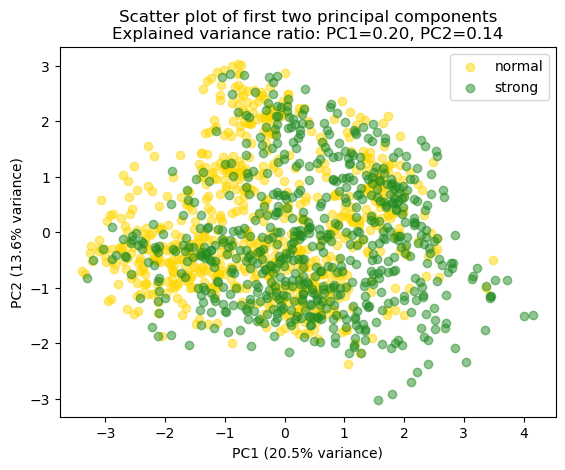

In [ ]:
# Performing PCA on all features (all 434 features)

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
from collections import defaultdict
from sklearn.decomposition import PCA

y= y_train.values
# Define colors for each label
color_map = {0: "#FFD700", 1: "#228B22"}
# color_map = {0: "skyblue", 1: "coral"}

# Add a fallback color for any other labels
fallback_color = mcolors.CSS4_COLORS['saddlebrown']
color_map = defaultdict(lambda: fallback_color, color_map)

# Fit PCA to the data
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)

# Get the explained variance ratio for each principal component
variance_ratio = pca.explained_variance_ratio_

# Create a list of point labels based on the true labels
label_names = {0: "normal", 1: "strong"}
point_labels = [label_names[label] for label in y]

# Plot the first two principal components with colors based on label
fig, ax = plt.subplots()
for label in np.unique(y):
    ix = np.where(y == label)
    ax.scatter(X_pca[ix, 0], X_pca[ix, 1], c=color_map[label], label=label_names[label], alpha=0.5)

# Add the explained variance ratio to the plot title
plt.title(f"Scatter plot of first two principal components\nExplained variance ratio: PC1={variance_ratio[0]:.2f}, PC2={variance_ratio[1]:.2f}")

# Add labels to the axes
plt.xlabel(f"PC1 ({variance_ratio[0]*100:.1f}% variance)")
plt.ylabel(f"PC2 ({variance_ratio[1]*100:.1f}% variance)")

# Add a legend to the plot
plt.legend()

# Show the plot
plt.show()
# Loadings vs Features for PCA

### 4.1.1)Loadings vs Features for PCA

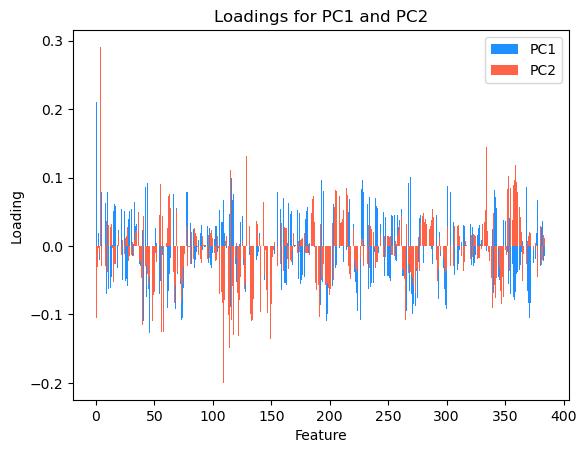

Number of selected features by each Principal Component: 386


In [ ]:
# Loadings vs Features for PCA

import numpy as np
import matplotlib.pyplot as plt

# Get the loadings for each feature on each principal component
loadings = pca.components_

# Get the number of components and features
n_components, n_features = loadings.shape

# Define the threshold for selecting important features
threshold = 0.0

# Get the feature names from the data
selected_features = X_train.columns.to_list()

# Loop over the principal components and find the important features
important_features = []
for component_loadings in loadings:
    important_indices = np.where(np.abs(component_loadings) > threshold)[0]
    important_features.append([selected_features[i] for i in important_indices])

# Get the loadings for the important features of PC1 and PC2
pc1_loadings = loadings[0, important_indices]
pc2_loadings = loadings[1, important_indices]

# Create a bar plot of the loadings for PC1 and PC2
fig, ax = plt.subplots()
ax.bar(np.arange(len(pc1_loadings)), pc1_loadings, color='dodgerblue', label='PC1')
ax.bar(np.arange(len(pc2_loadings)), pc2_loadings, color='tomato', label='PC2')

# Add labels and legend
ax.set_xlabel('Feature')
ax.set_ylabel('Loading')
ax.set_title('Loadings for PC1 and PC2')
ax.legend()
plt.show()

print(f"Number of selected features by each Principal Component: {len(important_features[0])}")

### 4.1.2) Testing Performance after PCA on whole Data set


#### Decision Tree

In [ ]:
len(selected_features)

438

In [ ]:
# Running this code will take some time, so I have added op as comments for reference

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Define the hyperparameters to search over
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 4, 6, 8, 10],
    'min_samples_split': [2, 4, 6, 8, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5]
}

# Create a decision tree classifier object
clf = DecisionTreeClassifier()

# Create a grid search object
grid_search = GridSearchCV(clf, param_grid, cv=5)

# Fit the grid search object to the data
grid_search.fit(X_train[selected_features], y_train)

# Use the best estimator to make predictions on the test set
y_pred = grid_search.best_estimator_.predict(X_val[selected_features])

# Print the evaluation metrics
print('Accuracy %s' % accuracy_score(y_val, y_pred))
print('F1-score %s' % f1_score(y_val, y_pred, average=None))
print(classification_report(y_val, y_pred))

Accuracy 0.7264770240700219
F1-score [0.72885033 0.72406181]
              precision    recall  f1-score   support

           0       0.78      0.69      0.73       245
           1       0.68      0.77      0.72       212

    accuracy                           0.73       457
   macro avg       0.73      0.73      0.73       457
weighted avg       0.73      0.73      0.73       457



In [ ]:
# Accuracy 0.7089715536105032 with X:val
# F1-score [0.7749577  0.58823529]
#               precision    recall  f1-score   support

#          0.0       0.66      0.93      0.77       245
#          1.0       0.86      0.45      0.59       212

#     accuracy                           0.71       457
#    macro avg       0.76      0.69      0.68       457
# weighted avg       0.75      0.71      0.69       457

In [ ]:
# Accuracy 0.7035256410256411 with X:test
# F1-score [0.75753604 0.6185567 ]
#               precision    recall  f1-score   support

#            0       0.68      0.86      0.76       336
#            1       0.76      0.52      0.62       288

#     accuracy                           0.70       624
#    macro avg       0.72      0.69      0.69       624
# weighted avg       0.72      0.70      0.69       624

#### KNN

In [ ]:
# Running this code will take some time, so I have added op as comments for reference

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Define the hyperparameters to search over
param_grid = {
    'n_neighbors': [1, 3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]
}

# Create a KNN classifier object
clf = KNeighborsClassifier()

# Create a grid search object
grid_search = GridSearchCV(clf, param_grid, cv=5)

# Fit the grid search object to the data
grid_search.fit(X_train[selected_features], y_train)

# Use the best estimator to make predictions on the test set
y_pred = grid_search.best_estimator_.predict(X_val[selected_features])

# Print the evaluation metrics
print('Accuracy %s' % accuracy_score(y_val, y_pred))
print('F1-score %s' % f1_score(y_val, y_pred, average=None))
print(classification_report(y_val, y_pred))

Accuracy 0.6980306345733042
F1-score [0.7406015  0.63874346]
              precision    recall  f1-score   support

           0       0.69      0.80      0.74       245
           1       0.72      0.58      0.64       212

    accuracy                           0.70       457
   macro avg       0.70      0.69      0.69       457
weighted avg       0.70      0.70      0.69       457



In [ ]:
# Accuracy 0.6805251641137856 with X:val
# F1-score [0.72761194 0.61375661]
#               precision    recall  f1-score   support

#          0.0       0.67      0.80      0.73       245
#          1.0       0.70      0.55      0.61       212

#     accuracy                           0.68       457
#    macro avg       0.68      0.67      0.67       457
# weighted avg       0.68      0.68      0.67       457

In [ ]:
# Accuracy 0.5464743589743589 with X:test
# F1-score [0.62615588 0.42362525]
#               precision    recall  f1-score   support

#            0       0.56      0.71      0.63       336
#            1       0.51      0.36      0.42       288

#     accuracy                           0.55       624
#    macro avg       0.54      0.53      0.52       624
# weighted avg       0.54      0.55      0.53       624


### 4.2)Performing PCA on reduced features after RFE (just 25 features)

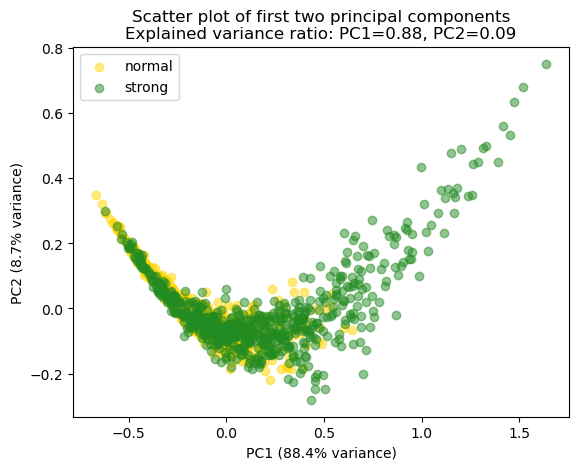

In [ ]:
# Performing PCA on reduced features after RFE (just 25 features)

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
from collections import defaultdict
from sklearn.decomposition import PCA

y= y_train.values
# Define colors for each label
color_map = {0: "#FFD700", 1: "#228B22"}

# Add a fallback color for any other labels
fallback_color = mcolors.CSS4_COLORS['saddlebrown']
color_map = defaultdict(lambda: fallback_color, color_map)

# Fit PCA to the data
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train[selected_features_list])

# Get the explained variance ratio for each principal component
variance_ratio = pca.explained_variance_ratio_

# Create a list of point labels based on the true labels
label_names = {0: "normal", 1: "strong"}
point_labels = [label_names[label] for label in y]

# Plot the first two principal components with colors based on label
fig, ax = plt.subplots()
for label in np.unique(y):
    ix = np.where(y == label)
    ax.scatter(X_pca[ix, 0], X_pca[ix, 1], c=color_map[label], label=label_names[label], alpha=0.5)

# Add the explained variance ratio to the plot title
plt.title(f"Scatter plot of first two principal components\nExplained variance ratio: PC1={variance_ratio[0]:.2f}, PC2={variance_ratio[1]:.2f}")

# Add labels to the axes
plt.xlabel(f"PC1 ({variance_ratio[0]*100:.1f}% variance)")
plt.ylabel(f"PC2 ({variance_ratio[1]*100:.1f}% variance)")

# Add a legend to the plot
plt.legend()

# Show the plot
plt.show()


In PCA, loadings represent the correlation between each original feature and each principal component. The loadings are calculated as the product of the standardized feature values and the corresponding eigenvector (or principal component) score.

More specifically, if we have a dataset with m observations and n features, we can standardize the data by subtracting the mean and dividing by the standard deviation for each feature. Let X be the resulting standardized data matrix of shape (m, n). We can then perform PCA on X to obtain k principal components, where k is less than or equal to n.

The loadings for the ith feature and jth principal component are given by:

Copy
loading_ij = eigenvector_ij * sqrt(eigenvalue_j)
where eigenvector_ij is the ith element of the jth eigenvector (or principal component), and eigenvalue_j is the jth eigenvalue of the covariance matrix of X.

The plot of loadings vs features shows the loadings for each feature on each principal component. Each bar in the plot represents the loading for a single feature on a single principal component. The height of the bar represents the magnitude of the loading, and the color of the bar (if applicable) represents the sign of the loading (positive or negative).

By examining the plot of loadings vs features, we can gain insights into which features are most strongly associated with each principal component. Features with high loadings on a particular component are considered to be important for that component, and contribute more to the variance explained by that component. Conversely, features with low loadings on a particular component are considered to be less important for that component, and may not contribute much to the variance explained by that component.

By analyzing the plot of loadings vs features, we can also identify any patterns or relationships between the features and the principal components. For example, we may observe that certain groups of features have high loadings on the same principal component, indicating that they are correlated with each other and may be capturing the same underlying information. We may also observe that certain features have high loadings on multiple principal components, indicating that they are relevant to multiple aspects of the data.

Overall, the plot of loadings vs features is a useful tool for interpreting the results of PCA and gaining insights into the underlying structure of the data.

### 4.2.1)Loadings vs Features for PCA

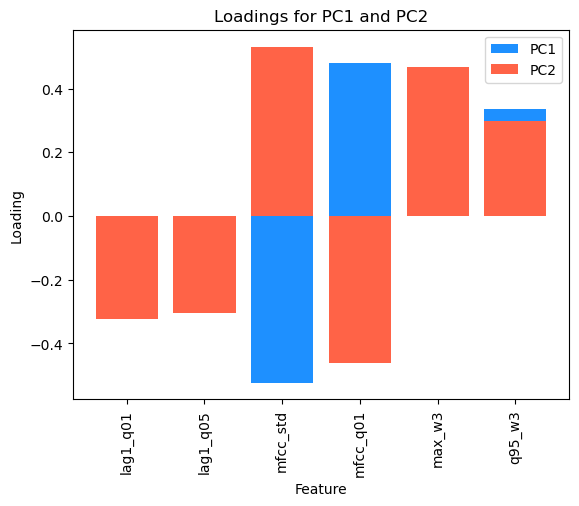

Number of selected features by each Principal Component: 6


In [ ]:
# Loadings vs Features for PCA

import numpy as np
import matplotlib.pyplot as plt

# Get the loadings for each feature on each principal component
loadings = pca.components_

# Get the number of components and features
n_components, n_features = loadings.shape

# Define the threshold for selecting important features
threshold = 0.0

# Get the feature names from the data
selected_features = selected_features_list.copy()

# Loop over the principal components and find the important features
important_features = []
for component_loadings in loadings:
    important_indices = np.where(np.abs(component_loadings) > threshold)[0]
    important_features.append([selected_features[i] for i in important_indices])

# Get the loadings for the important features of PC1 and PC2
pc1_loadings = loadings[0, important_indices]
pc2_loadings = loadings[1, important_indices]

# Create a bar plot of the loadings for PC1 and PC2
fig, ax = plt.subplots()
ax.bar(np.arange(len(pc1_loadings)), pc1_loadings, color='dodgerblue', label='PC1')
ax.bar(np.arange(len(pc2_loadings)), pc2_loadings, color='tomato', label='PC2')

# Set the x-axis labels to the important feature names
ax.set_xticks(np.arange(len(pc1_loadings)))
ax.set_xticklabels(important_features[0], rotation=90)

# Add labels and legend
ax.set_xlabel('Feature')
ax.set_ylabel('Loading')
ax.set_title('Loadings for PC1 and PC2')
ax.legend()
plt.show()

print(f"Number of selected features by each Principal Component: {len(important_features[0])}")

### 4.2.2) Testing Performance after PCA on whole Data set


#### Decision Tree

In [ ]:
len(selected_features)

6

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Define the hyperparameters to search over
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 4, 6, 8, 10],
    'min_samples_split': [2, 4, 6, 8, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5]
}

# Create a decision tree classifier object
clf = DecisionTreeClassifier()

# Create a grid search object
grid_search = GridSearchCV(clf, param_grid, cv=5)

# Fit the grid search object to the data
grid_search.fit(X_train[selected_features], y_train)

# Use the best estimator to make predictions on the test set
y_pred = grid_search.best_estimator_.predict(X_val[selected_features])

# Print the evaluation metrics
print('Accuracy %s' % accuracy_score(y_val, y_pred))
print('F1-score %s' % f1_score(y_val, y_pred, average=None))
print(classification_report(y_val, y_pred))

Accuracy 0.7133479212253829
F1-score [0.76731794 0.62678063]
              precision    recall  f1-score   support

           0       0.68      0.88      0.77       245
           1       0.79      0.52      0.63       212

    accuracy                           0.71       457
   macro avg       0.74      0.70      0.70       457
weighted avg       0.73      0.71      0.70       457



#### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Define the hyperparameters to search over
param_grid = {
    'n_neighbors': [1, 3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]
}

# Create a KNN classifier object
clf = KNeighborsClassifier()

# Create a grid search object
grid_search = GridSearchCV(clf, param_grid, cv=5)

# Fit the grid search object to the data
grid_search.fit(X_train[selected_features], y_train)

# Use the best estimator to make predictions on the test set
y_pred = grid_search.best_estimator_.predict(X_val[selected_features])

# Print the evaluation metrics
print('Accuracy %s' % accuracy_score(y_val, y_pred))
print('F1-score %s' % f1_score(y_val, y_pred, average=None))
print(classification_report(y_val, y_pred))

Accuracy 0.6914660831509847
F1-score [0.73840445 0.624     ]
              precision    recall  f1-score   support

           0       0.68      0.81      0.74       245
           1       0.72      0.55      0.62       212

    accuracy                           0.69       457
   macro avg       0.70      0.68      0.68       457
weighted avg       0.70      0.69      0.69       457



## 5)Random Subspace Projection

In [ ]:
from sklearn import random_projection
rsp = random_projection.GaussianRandomProjection(n_components=2, random_state=0)
X_train_rsp = rsp.fit_transform(X_train)
X_train_rsp.shape

(1371, 2)

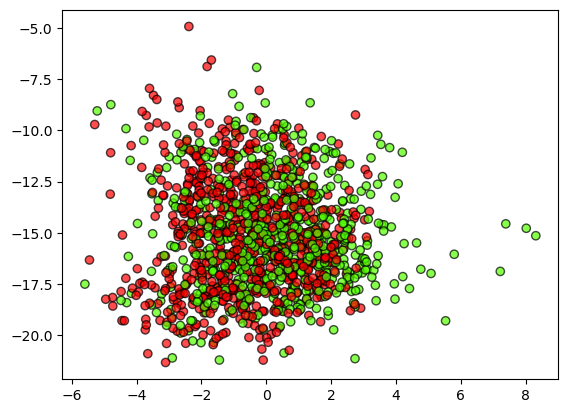

In [ ]:
plt.scatter(X_train_rsp[:, 0], X_train_rsp[:, 1], c=y_train, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

In [ ]:
# KNN
X_val_rsp = rsp.transform(X_val)

clf = KNeighborsClassifier(n_neighbors=13)
clf.fit(X_train_rsp, y_train)

y_pred = clf.predict(X_val_rsp)

print('Accuracy %s' % accuracy_score(y_val, y_pred))
print('F1-score %s' % f1_score(y_val, y_pred, average=None))
print(classification_report(y_val, y_pred))

X_val_rsp.shape

Accuracy 0.5842450765864332
F1-score [0.63878327 0.51030928]
              precision    recall  f1-score   support

           0       0.60      0.69      0.64       245
           1       0.56      0.47      0.51       212

    accuracy                           0.58       457
   macro avg       0.58      0.58      0.57       457
weighted avg       0.58      0.58      0.58       457



(457, 2)

In [ ]:
# KNN
X_val_rsp = rsp.transform(X_val)

clf = DecisionTreeClassifier(criterion='entropy', max_depth=2)
clf.fit(X_train_rsp, y_train)

y_pred = clf.predict(X_val_rsp)

print('Accuracy %s' % accuracy_score(y_val, y_pred))
print('F1-score %s' % f1_score(y_val, y_pred, average=None))
print(classification_report(y_val, y_pred))

X_val_rsp.shape

Accuracy 0.612691466083151
F1-score [0.70840198 0.42345277]
              precision    recall  f1-score   support

           0       0.59      0.88      0.71       245
           1       0.68      0.31      0.42       212

    accuracy                           0.61       457
   macro avg       0.64      0.59      0.57       457
weighted avg       0.64      0.61      0.58       457



(457, 2)

## 6)Multi Dimensional Scaling


In [ ]:
from sklearn.manifold import MDS
mds = MDS(n_components=2) #, normalized_stress='auto') # shoudl run as sammon mapping
X_train_mds = mds.fit_transform(X_train)
X_train_mds.shape

(1371, 2)

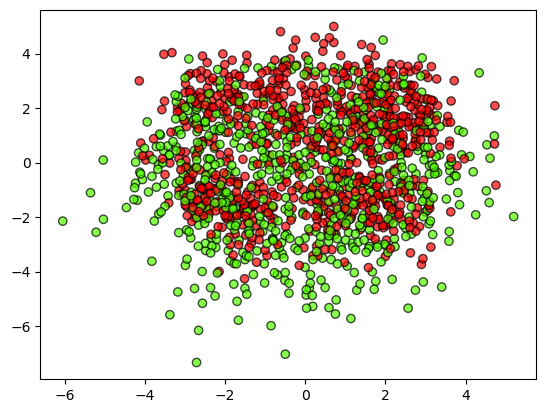

In [ ]:
plt.scatter(X_train_mds[:, 0], X_train_mds[:, 1], c=y_train, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

In [ ]:
# KNN
clf = KNeighborsClassifier(n_neighbors=13)
clf.fit(X_train_mds, y_train)

y_pred = clf.predict(X_train_mds)

print('Accuracy %s' % accuracy_score(y_train, y_pred))
print('F1-score %s' % f1_score(y_train, y_pred, average=None))
print(classification_report(y_train, y_pred))


Accuracy 0.7024070021881839
F1-score [0.7394636  0.65306122]
              precision    recall  f1-score   support

           0       0.70      0.78      0.74       739
           1       0.71      0.61      0.65       632

    accuracy                           0.70      1371
   macro avg       0.70      0.70      0.70      1371
weighted avg       0.70      0.70      0.70      1371



In [ ]:
# Decision Tree
clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_train_mds, y_train)

y_pred = clf.predict(X_train_mds)

print('Accuracy %s' % accuracy_score(y_train, y_pred))
print('F1-score %s' % f1_score(y_train, y_pred, average=None))
print(classification_report(y_train, y_pred))

Accuracy 0.8716265499635303
F1-score [0.88203753 0.8592    ]
              precision    recall  f1-score   support

           0       0.87      0.89      0.88       739
           1       0.87      0.85      0.86       632

    accuracy                           0.87      1371
   macro avg       0.87      0.87      0.87      1371
weighted avg       0.87      0.87      0.87      1371



# Outlier Detection

In [ ]:
# Checking performance of classification Before outlier removal
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Define the hyperparameters to search over
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 4, 6, 8, 10],
    'min_samples_split': [2, 4, 6, 8, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5]
}

# Create a decision tree classifier object
clf = DecisionTreeClassifier()

# Create a grid search object
grid_search = GridSearchCV(clf, param_grid, cv=5)

# Fit the grid search object to the data
grid_search.fit(X_train[selected_features], y_train)

# Use the best estimator to make predictions on the test set
y_pred = grid_search.best_estimator_.predict(X_val[selected_features])

# Print the evaluation metrics
print('Decision Tree Classifier Performance BEFORE removing outliers:')
print('Accuracy %s' % accuracy_score(y_val, y_pred))
print('F1-score %s' % f1_score(y_val, y_pred, average=None))
print(classification_report(y_val, y_pred))

Decision Tree Classifier Performance BEFORE removing outliers:
Accuracy 0.7133479212253829
F1-score [0.76731794 0.62678063]
              precision    recall  f1-score   support

           0       0.68      0.88      0.77       245
           1       0.79      0.52      0.63       212

    accuracy                           0.71       457
   macro avg       0.74      0.70      0.70       457
weighted avg       0.73      0.71      0.70       457



In [ ]:
# Finding the best K and T
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report

# define a range of values for k and T
k_values = [5, 10, 15, 20]
T_values = [2, 5, 8, 10]

# initialize variables to store the best hyperparameters and performance
max_f1_score = 0
max_accuracy = 0
best_k = None
best_T = None

# iterate over all possible combinations of k and T
for k in k_values:
    for T in T_values:
        
        # calculate the in-degree of each vertex in the kNN graph
        n = X_train.shape[0] # number of vertices in graph
        graph = np.zeros((n, n))
        for i in range(n):
            distances = np.linalg.norm(X_train - X_train.iloc[i], axis=1)
            neighbors = np.argsort(distances)[1:k+1] # exclude self as nearest neighbor
            for j in neighbors:
                graph[i][j] = 1 # add directed edge from i to j
        in_degree = np.sum(graph, axis=0)

        # detect outliers based on in-degree threshold
        outliers = np.where(in_degree <= T)[0]
        inliers = np.where(in_degree > T)[0]

        # remove the outliers from the training set
        X_train_filtered = X_train.iloc[inliers]
        y_train_filtered = y_train.iloc[inliers]

        # train a decision tree classifier
        dtc = DecisionTreeClassifier(random_state=42)
        dtc.fit(X_train_filtered, y_train_filtered)

        # make predictions on the test set
        y_pred = dtc.predict(X_test)

        # evaluate the performance of the decision tree classifier
        f1 = f1_score(y_test, y_pred, average='weighted')
        acc = accuracy_score(y_test, y_pred)
        # print('k =', k, ', T =', T)
        # print('Accuracy:', acc)
        # print('F1 Score:', f1)
        # print(classification_report(y_test, y_pred)) 
        
        # update max_f1_score and max_accuracy if current values are higher
        if f1 > max_f1_score and acc > max_accuracy:
            max_f1_score = f1
            max_accuracy = acc
            best_k = k
            best_T = T
            
print('Best k =', best_k, ', Best T =', best_T)
print('Accuracy:', max_accuracy)
print('F1 Score:', max_f1_score)

Best k = 10 , Best T = 2
Accuracy: 0.7019230769230769
F1 Score: 0.7021168670653207


In [ ]:
selected_features

['lag1_q01', 'lag1_q05', 'mfcc_std', 'mfcc_q01', 'max_w3', 'q95_w3']

In [ ]:
X_train = df_train[attributes]
y_train = df_train[target_name]
X_test = df_test[attributes]
y_test = df_test[target_name]

In [ ]:
for x in selected_features: 
    print(x in X_train)


True
True
True
True
True
True


In [ ]:
# Using the found values for K=10 and T=2
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report

# print the shape of the dataset before removing outliers
print('Shape of dataset(X_train) before removing outliers:', X_train[selected_features].shape)
print('Shape of dataset(X_test) before removing outliers:', X_test[selected_features].shape)

# calculate the in-degree of each vertex in the kNN graph
k = 10 # number of neighbors for kNN graph
T = 2 # in-degree threshold for outlier detection
n = X_train[selected_features].shape[0] # number of vertices in graph
graph = np.zeros((n, n))
for i in range(n):
    distances = np.linalg.norm(X_train[selected_features] - X_train[selected_features].iloc[i], axis=1)
    neighbors = np.argsort(distances)[1:k+1] # exclude self as nearest neighbor
    for j in neighbors:
        graph[i][j] = 1 # add directed edge from i to j
in_degree = np.sum(graph, axis=0)

# detect outliers based on in-degree threshold
outliers = np.where(in_degree <= T)[0]
inliers = np.where(in_degree > T)[0]

# remove the outliers from the training set
X_train_rem = X_train[selected_features].iloc[inliers]
y_train_rem = y_train.iloc[inliers]

# train a decision tree classifier
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train_rem, y_train_rem)

Shape of dataset before removing outliers: (1828, 6)
Shape of dataset before removing outliers: (624, 6)


DecisionTreeClassifier(random_state=42)

In [ ]:
X_train_rem.shape #'Shape of dataset(X_train) after removing outliers:

(1760, 6)

In [2]:
X_test.shape #'Shape of dataset(X_test) before removing outliers:

NameError: ignored

In [ ]:
# Checking performance of classification fter outlier removal
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Define the hyperparameters to search over
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 4, 6, 8, 10],
    'min_samples_split': [2, 4, 6, 8, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5]
}

# Create a decision tree classifier object
clf = DecisionTreeClassifier()

# Create a grid search object
grid_search = GridSearchCV(clf, param_grid, cv=5)

# Fit the grid search object to the data
grid_search.fit(X_train_rem, y_train_rem)

# Use the best estimator to make predictions on the test set
y_pred = grid_search.best_estimator_.predict(X_val[selected_features])

# Print the evaluation metrics
print('Decision Tree Classifier Performance AFTER removing outliers:')
print('Accuracy %s' % accuracy_score(y_val, y_pred))
print('F1-score %s' % f1_score(y_val, y_pred, average=None))
print(classification_report(y_val, y_pred))

Decision Tree Classifier Performance AFTER removing outliers:
Accuracy 0.7177242888402626
F1-score [0.77720207 0.61492537]
              precision    recall  f1-score   support

           0       0.67      0.92      0.78       245
           1       0.84      0.49      0.61       212

    accuracy                           0.72       457
   macro avg       0.76      0.70      0.70       457
weighted avg       0.75      0.72      0.70       457



In [ ]:
# Decision Tree Classifier Performance AFTER removing outliers: with X_val
# Accuracy 0.7155361050328227
# F1-score [0.77430556 0.61538462]
#               precision    recall  f1-score   support

#          0.0       0.67      0.91      0.77       245
#          1.0       0.83      0.49      0.62       212

#     accuracy                           0.72       457
#    macro avg       0.75      0.70      0.69       457
# weighted avg       0.74      0.72      0.70       457

In [ ]:
# Decision Tree Classifier Performance AFTER removing outliers: with X_test
# Accuracy 0.5384615384615384
# F1-score [0.7 0. ]
#               precision    recall  f1-score   support

#            0       0.54      1.00      0.70       336
#            1       0.00      0.00      0.00       288

#     accuracy                           0.54       624
#    macro avg       0.27      0.50      0.35       624
# weighted avg       0.29      0.54      0.38       624
